# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score,\
                            precision_score, make_scorer,\
                            classification_report,confusion_matrix,\
                            ConfusionMatrixDisplay, average_precision_score,\
                            roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings('ignore')

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_male = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr', encoding='latin-1')

In [3]:
df_female= pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [4]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [5]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [6]:
df_female = df_female.rename(columns={"SubjectId": "subjectid"})


In [7]:
df_female.head(5)


,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [8]:
print(df_male.shape)
print(df_female.shape)

(4082, 108)
(1986, 108)


In [9]:
df = pd.concat([df_male,df_female], axis=0, ignore_index=True)
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [10]:
df.shape

(6068, 108)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [12]:
df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [13]:
df.isnull().sum().any()
# es gibt fehlende Werte 

True

In [14]:
df.duplicated().sum()

# keine doppelten Werte

0

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64


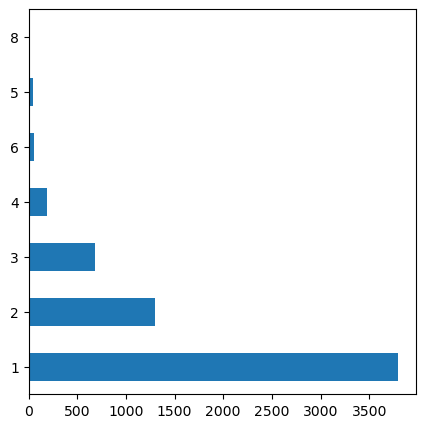

In [15]:
print(df["DODRace"].value_counts())
df["DODRace"].value_counts().plot(kind="barh",figsize=(5,5));

In [16]:
for col in df:
  if df[col].isnull().sum()>0:
    print(f"{col} = {df[col].isnull().sum()}")


Ethnicity = 4647


In [17]:
df.drop(columns = 'Ethnicity', inplace=True)

# Ich lösche die Spalte „Ethnicity“.

In [18]:
df.isnull().sum().any()

# es gibt fehlende Werte

False

In [19]:
df.shape


(6068, 107)

In [20]:
for col in df.select_dtypes("object"):
  print(f"{col} hat {df[col].nunique()} Eindeutige Werte.")


Gender hat 2 Eindeutige Werte.
Date hat 253 Eindeutige Werte.
Installation hat 12 Eindeutige Werte.
Component hat 3 Eindeutige Werte.
Branch hat 3 Eindeutige Werte.
PrimaryMOS hat 285 Eindeutige Werte.
SubjectsBirthLocation hat 152 Eindeutige Werte.
WritingPreference hat 3 Eindeutige Werte.


In [21]:
df.DODRace.unique()


array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [22]:
df["DODRace"] = df.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})


In [23]:
df.groupby(["Component"])["DODRace"].value_counts(normalize=True)

# über component feature kann ich über die Rassen keine Aussage tätigen


Component            DODRace         
Army National Guard  White               0.685007
                     Black               0.184269
                     Hispanic            0.093427
                     Asian               0.022157
                     Native American     0.008863
                     Pacific Islander    0.006278
Army Reserve         White               0.518182
                     Black               0.236364
                     Hispanic            0.186364
                     Asian               0.040909
                     Pacific Islander    0.013636
                     Native American     0.004545
Regular Army         White               0.580573
                     Black               0.237898
                     Hispanic            0.122611
                     Asian               0.037898
                     Pacific Islander    0.012420
                     Native American     0.007643
                     Other               0.000955
Name: DODRac

In [24]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts(normalize=True)

# über Branch feature kann ich über die Rassen keine Aussage tätigen


Component            Branch                  DODRace         
Army National Guard  Combat Arms             White               0.771995
                                             Black               0.097893
                                             Hispanic            0.091698
                                             Asian               0.022305
                                             Native American     0.011152
                                             Pacific Islander    0.004957
                     Combat Service Support  White               0.643509
                                             Black               0.218947
                                             Hispanic            0.099649
                                             Asian               0.023158
                                             Pacific Islander    0.007719
                                             Native American     0.007018
                     Combat Support          White

In [25]:
df.SubjectNumericRace.value_counts()


1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [26]:
df.drop(columns= ["Date", "Installation", "Component", "Branch", "PrimaryMOS","Weightlbs",\
                  "Heightin", "subjectid", "SubjectNumericRace"], inplace=True)


In [27]:
df.shape

(6068, 98)

In [28]:
df['DODRace'].value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [29]:
df = df[df["DODRace"].apply(lambda x: x=="White" or x=="Black" or x=="Hispanic")]


In [30]:
df.reset_index(drop=True, inplace=True)

In [31]:
df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,White,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

<AxesSubplot:>

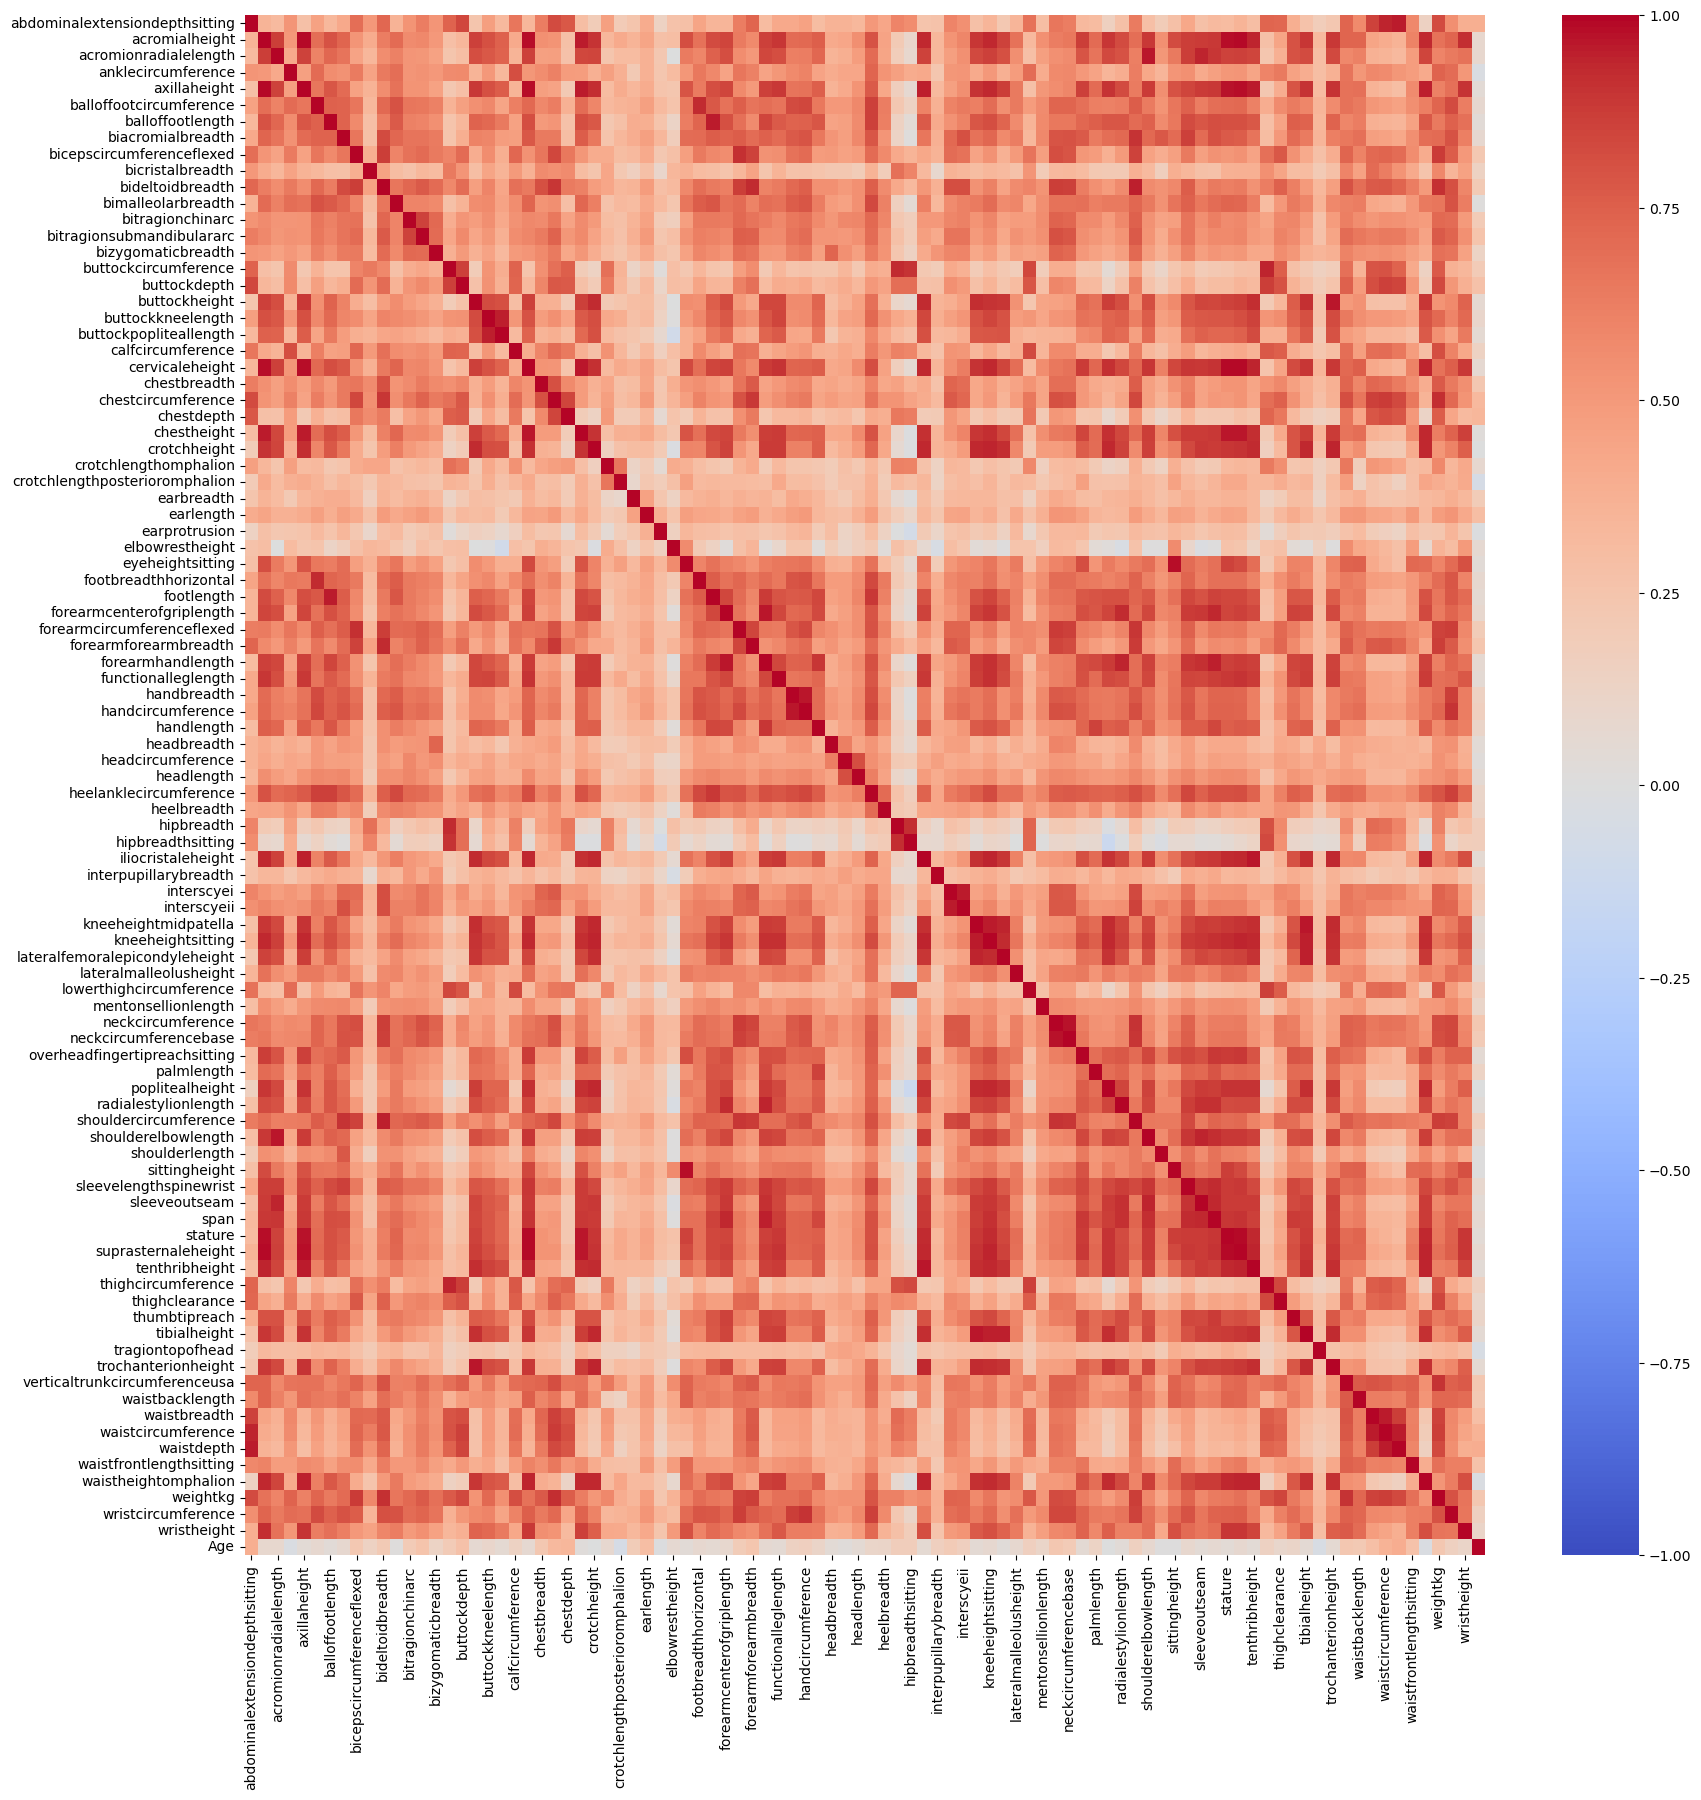

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),vmin=-1, vmax=1, cmap ="coolwarm")


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5769.0,247.254290,37.457748,155.0,220.0,243.0,272.0,451.0
acromialheight,5769.0,1408.630265,78.303123,1146.0,1353.0,1412.0,1464.0,1683.0
acromionradialelength,5769.0,328.071590,20.444554,249.0,314.0,328.0,342.0,393.0
anklecircumference,5769.0,225.201768,15.965783,156.0,214.0,225.0,235.0,293.0
axillaheight,5769.0,1301.902583,71.260913,1062.0,1252.0,1304.0,1351.0,1553.0
balloffootcircumference,5769.0,244.408043,16.803556,186.0,233.0,245.0,256.0,306.0
balloffootlength,5769.0,195.118911,13.379000,151.0,186.0,196.0,205.0,245.0
biacromialbreadth,5769.0,399.706015,30.124094,283.0,377.0,404.0,422.0,489.0
bicepscircumferenceflexed,5769.0,341.663027,41.270615,216.0,312.0,342.0,370.0,490.0
bicristalbreadth,5769.0,274.903449,19.239580,197.0,262.0,274.0,288.0,362.0


# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [34]:
X = df.drop(["DODRace"],axis=1)
y = df["DODRace"]

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=101)

In [36]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


In [37]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [38]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## 1. Logistic model

### Vanilla Logistic Model

In [39]:
cat = X_train.select_dtypes("object").columns
cat 

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [40]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",
                                                      sparse=False), cat),
                                                      remainder=MinMaxScaler(),
                                                      verbose_feature_names_out=False)

In [41]:
from sklearn.pipeline import Pipeline
operations = [("OneHotEncoder", column_trans),
              ("log", LogisticRegression(class_weight='balanced',
                                         max_iter=10000,
                                         random_state=101))]

pipe_log_model = Pipeline(steps=operations)

In [42]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[239  14   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   38   29]
 [  20  456   67]
 [  57  362 2615]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



In [43]:
scoring = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels = ["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"])}

In [44]:
operations = [("OneHotEncoder", column_trans), 
              ("log", LogisticRegression(class_weight='balanced',
                                         max_iter=10000,
                                         random_state=101))]

model = Pipeline(steps=operations)


scores = cross_validate(model,
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
display(df_scores)
df_scores.mean()[2:]

,fit_time,score_time,test_precision_Hispanic,train_precision_Hispanic,test_recall_Hispanic,train_recall_Hispanic,test_f1_Hispanic,train_f1_Hispanic
1,1.066438,0.017674,0.467391,0.540897,0.781818,0.840164,0.585034,0.658106
2,1.218499,0.018859,0.479167,0.532723,0.836364,0.834016,0.609272,0.650160
3,1.150396,0.012061,0.565789,0.521851,0.781818,0.831967,0.656489,0.641390
4,1.033286,0.019025,0.482353,0.529639,0.759259,0.840491,0.589928,0.649802
5,1.085244,0.016260,0.500000,0.532110,0.796296,0.830266,0.614286,0.648562
6,1.069589,0.020927,0.460674,0.542933,0.759259,0.840491,0.573427,0.659711
7,1.137400,0.013358,0.472527,0.541393,0.796296,0.842536,0.593103,0.659200
8,1.077865,0.022180,0.481013,0.535668,0.703704,0.844581,0.571429,0.655556
9,0.998513,0.018355,0.494118,0.521628,0.777778,0.838446,0.604317,0.643137
10,1.020289,0.016189,0.493827,0.533505,0.740741,0.846626,0.592593,0.654545


test_precision_Hispanic     0.489686
train_precision_Hispanic    0.533235
test_recall_Hispanic        0.773333
train_recall_Hispanic       0.838958
test_f1_Hispanic            0.598988
train_f1_Hispanic           0.652017
dtype: float64

### Logistic Model GridsearchCV

In [45]:
recall_Hisp =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [46]:
param_grid = {
    "log__C": [0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [47]:
operations = [("OneHotEncoder", column_trans), 
              ("log", LogisticRegression(class_weight='balanced',
                                         max_iter=10000,
                                         random_state=101))]

model = Pipeline(steps=operations)


log_model_grid = GridSearchCV(model,
                              param_grid,
                              scoring=recall_Hisp,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [48]:
log_model_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [49]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [50]:
pd.DataFrame(log_model_grid.cv_results_).loc[log_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.773333
mean_train_score    0.838958
Name: 7, dtype: object

In [51]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[239  14   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   38   29]
 [  20  456   67]
 [  57  362 2615]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



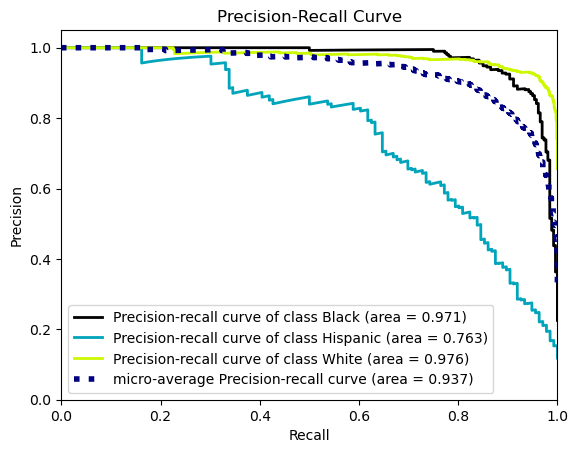

In [54]:
from scikitplot.metrics import plot_roc, plot_precision_recall

operations = [("OneHotEncoder", column_trans), 
              ("log", LogisticRegression(class_weight='balanced',
                                         max_iter=10000,
                                         random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [55]:
y_pred = log_model_grid.predict(X_test)

log_AP = .763
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])


## 2. SVC

### Vanilla SVC model 

In [56]:
operations_svc = [("OneHotEncoder", column_trans), 
                  ("svc", SVC(class_weight="balanced",random_state=101))]

pipe_svc_model = Pipeline(steps=operations_svc)

In [57]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  12   8]
 [  5 111  20]
 [ 20 109 629]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.48      0.82      0.60       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 956   42   40]
 [  23  456   64]
 [  54  426 2554]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [58]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv=10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
display(df_scores)
df_scores.mean()[2:]

,fit_time,score_time,test_precision_Hispanic,train_precision_Hispanic,test_recall_Hispanic,train_recall_Hispanic,test_f1_Hispanic,train_f1_Hispanic
1,3.712737,0.397317,0.466667,0.489130,0.763636,0.829918,0.579310,0.615502
2,2.766909,0.278995,0.494845,0.493333,0.872727,0.834016,0.631579,0.619954
3,2.541433,0.298901,0.471264,0.499385,0.745455,0.831967,0.577465,0.624135
4,2.403572,0.321329,0.434783,0.496377,0.740741,0.840491,0.547945,0.624146
5,2.365264,0.290398,0.430000,0.493252,0.796296,0.822086,0.558442,0.616564
6,2.469686,0.303007,0.401961,0.502463,0.759259,0.834356,0.525641,0.627210
7,2.471686,0.299818,0.427083,0.497549,0.759259,0.830266,0.546667,0.622222
8,2.458031,0.289334,0.463415,0.495215,0.703704,0.846626,0.558824,0.624906
9,2.314827,0.289641,0.462366,0.493961,0.796296,0.836401,0.585034,0.621109
10,2.437296,0.295485,0.455696,0.489941,0.666667,0.846626,0.541353,0.620690


test_precision_Hispanic     0.450808
train_precision_Hispanic    0.495061
test_recall_Hispanic        0.760404
train_recall_Hispanic       0.835275
test_f1_Hispanic            0.565226
train_f1_Hispanic           0.621644
dtype: float64

###  SVC Model GridsearchCV

In [59]:
param_grid = {
    'svc__C': [0.5, 1],
    'svc__gamma': ["scale", "auto", 0.01]
}

In [60]:
operations_svc = [("OneHotEncoder", column_trans),
                  ("svc", SVC(class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              scoring=recall_Hisp,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [61]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [62]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(C=1, class_weight='balanced', random_state=101))])

In [63]:
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.760404
mean_train_score    0.835275
Name: 3, dtype: object

In [64]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[240  12   8]
 [  5 111  20]
 [ 20 109 629]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.48      0.82      0.60       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 956   42   40]
 [  23  456   64]
 [  54  426 2554]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



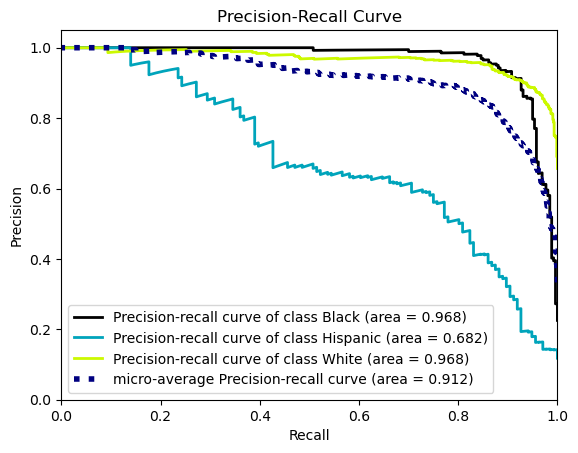

In [65]:
operations = [("OneHotEncoder", column_trans), 
              ("svc", SVC(C=1, class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

    
plot_precision_recall(y_test, decision_function)
plt.show();

In [67]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = .682
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

In [68]:
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [69]:
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', 
                         unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), 
                                       remainder='passthrough')

### Vanilla RF Model

In [70]:
operations_rf = [("OrdinalEncoder", column_trans), 
                 ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                     random_state=101))]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [71]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[191   0  69]
 [ 10   6 120]
 [ 10   2 746]]
              precision    recall  f1-score   support

       Black       0.91      0.73      0.81       260
    Hispanic       0.75      0.04      0.08       136
       White       0.80      0.98      0.88       758

    accuracy                           0.82      1154
   macro avg       0.82      0.59      0.59      1154
weighted avg       0.82      0.82      0.77      1154


Train_Set
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [72]:
operations_rf = [("OrdinalEncoder", column_trans), 
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     random_state=101))]

model = Pipeline(steps=operations_rf)

scores = cross_validate(model,
                        X_train, 
                        y_train,
                        scoring=scoring,
                        cv=5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.777143
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.025807
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.049538
train_f1_Hispanic           1.000000
dtype: float64

### RF Model GridsearchCV

In [73]:
param_grid = {'RF_model__n_estimators':[400,500],
             'RF_model__max_depth':[2,3]}
             

In [74]:
operations_rf = [("OrdinalEncoder", column_trans),
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     random_state=101))]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             scoring=recall_Hisp,
                             n_jobs=-1,
                             return_train_score=True)

In [75]:
rf_grid_model.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [76]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        n_estimators=400, random_state=101))])

In [77]:
rf_grid_model.best_params_

{'RF_model__max_depth': 2, 'RF_model__n_estimators': 400}

In [78]:
pd.DataFrame(rf_grid_model.cv_results_).loc[rf_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.609582
mean_train_score    0.645955
Name: 0, dtype: object

In [79]:
rf_grid_model.best_score_

0.6095820591233435

In [80]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[174  50  36]
 [ 16  76  44]
 [ 91 244 423]]
              precision    recall  f1-score   support

       Black       0.62      0.67      0.64       260
    Hispanic       0.21      0.56      0.30       136
       White       0.84      0.56      0.67       758

    accuracy                           0.58      1154
   macro avg       0.56      0.60      0.54      1154
weighted avg       0.72      0.58      0.62      1154


Train_Set
[[ 702  204  132]
 [  45  346  152]
 [ 246 1105 1683]]
              precision    recall  f1-score   support

       Black       0.71      0.68      0.69      1038
    Hispanic       0.21      0.64      0.31       543
       White       0.86      0.55      0.67      3034

    accuracy                           0.59      4615
   macro avg       0.59      0.62      0.56      4615
weighted avg       0.75      0.59      0.64      4615



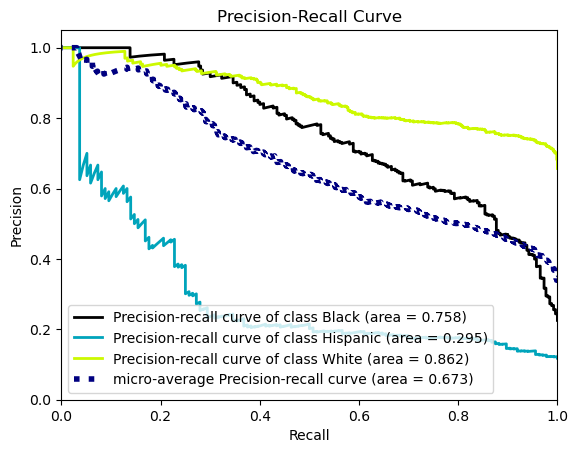

In [81]:
operations_rf = [("OrdinalEncoder", column_trans), 
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     max_depth=2, 
                                                     n_estimators=400, 
                                                     random_state=101))]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [83]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = .295
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

In [84]:
recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

array([0.55882353])

## 4. XGBoost

### Vanilla XGBoost Model

In [85]:
operations_xgb = [("OrdinalEncoder", column_trans), 
                  ("XGB_model", XGBClassifier(random_state=101))]

pipe_model_xgb = Pipeline(steps=operations_xgb)

y_train_xgb = y_train.map({"Black":0, "Hispanic":1, "White":2})
y_test_xgb = y_test.map({"Black":0, "Hispanic":1, "White":2})



pipe_model_xgb.fit(X_train, y_train_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [86]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[227   4  29]
 [  8  51  77]
 [ 16  10 732]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       260
           1       0.78      0.38      0.51       136
           2       0.87      0.97      0.92       758

    accuracy                           0.88      1154
   macro avg       0.85      0.74      0.77      1154
weighted avg       0.87      0.88      0.86      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [87]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', 
                                                     y=y_train_xgb)
classes_weights


array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

In [88]:
my_dict = {"weights": classes_weights, "label":y_train_xgb}

comp = pd.DataFrame(my_dict)

comp.head()

,weights,label
893,2.833026,1
196,0.507031,2
3821,0.507031,2
3206,0.507031,2
4500,1.482017,0


In [89]:
comp.groupby("label").value_counts()


label  weights 
0      1.482017    1038
1      2.833026     543
2      0.507031    3034
dtype: int64

In [90]:
pipe_model_xgb.fit(X_train,
                   y_train_xgb,  
                   XGB_model__sample_weight=classes_weights)


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [91]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[231   2  27]
 [ 11  64  61]
 [ 21  20 717]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       260
           1       0.74      0.47      0.58       136
           2       0.89      0.95      0.92       758

    accuracy                           0.88      1154
   macro avg       0.84      0.77      0.79      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [92]:
scoring_xgb = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =[1]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =[1]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =[1])}


In [93]:
operations_xgb = [("OrdinalEncoder", column_trans), 
                  ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, 
                        X_train, 
                        y_train_xgb, 
                        scoring=scoring_xgb,
                        cv=5, 
                        return_train_score=True,
                        fit_params={"XGB_model__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.694862
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.427234
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.528032
train_f1_Hispanic           1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [94]:
param_grid = {"XGB_model__n_estimators":[20, 40],
              'XGB_model__max_depth':[1,2],
              "XGB_model__learning_rate": [0.03, 0.05],
              "XGB_model__subsample":[0.8, 1],
              "XGB_model__colsample_bytree":[0.8, 1]}

In [95]:
operations_xgb = [("OrdinalEncoder", column_trans),
                  ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring=make_scorer(recall_score, average = None, labels =[1]),
                              cv=5,
                              n_jobs=-1,
                              return_train_score=True)

In [96]:
xgb_grid_model.fit(X_train,
                   y_train_xgb,
                   XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [97]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=20,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [98]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 20,
 'XGB_model__subsample': 0.8}

In [99]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.561774
mean_train_score    0.621083
Name: 12, dtype: object

In [100]:
xgb_grid_model.best_score_

0.5617737003058105

In [101]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[190  42  28]
 [ 20  70  46]
 [106 188 464]]
              precision    recall  f1-score   support

           0       0.60      0.73      0.66       260
           1       0.23      0.51      0.32       136
           2       0.86      0.61      0.72       758

    accuracy                           0.63      1154
   macro avg       0.57      0.62      0.57      1154
weighted avg       0.73      0.63      0.66      1154


Train_Set
[[ 753  165  120]
 [  79  323  141]
 [ 293  776 1965]]
              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1038
           1       0.26      0.59      0.36       543
           2       0.88      0.65      0.75      3034

    accuracy                           0.66      4615
   macro avg       0.60      0.66      0.60      4615
weighted avg       0.76      0.66      0.69      4615



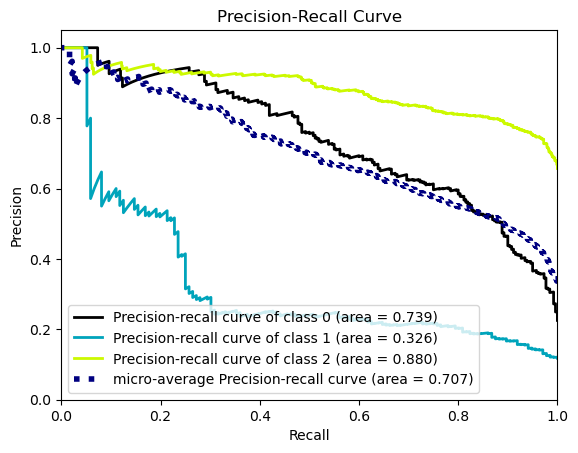

In [102]:
from scikitplot.metrics import plot_roc, precision_recall_curve


operations_xgb = [("OrdinalEncoder", column_trans), 
                  ("XGB_model", XGBClassifier(colsample_bytree=0.8,
                                              learning_rate=0.05,
                                              max_depth=2,
                                              n_estimators=20,
                                              subsample=0.8,
                                              random_state=101))]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, 
          y_train_xgb, 
          XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show()

In [104]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = .326
xgb_f1 = f1_score(y_test_xgb, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=[1])

## Comparing Models

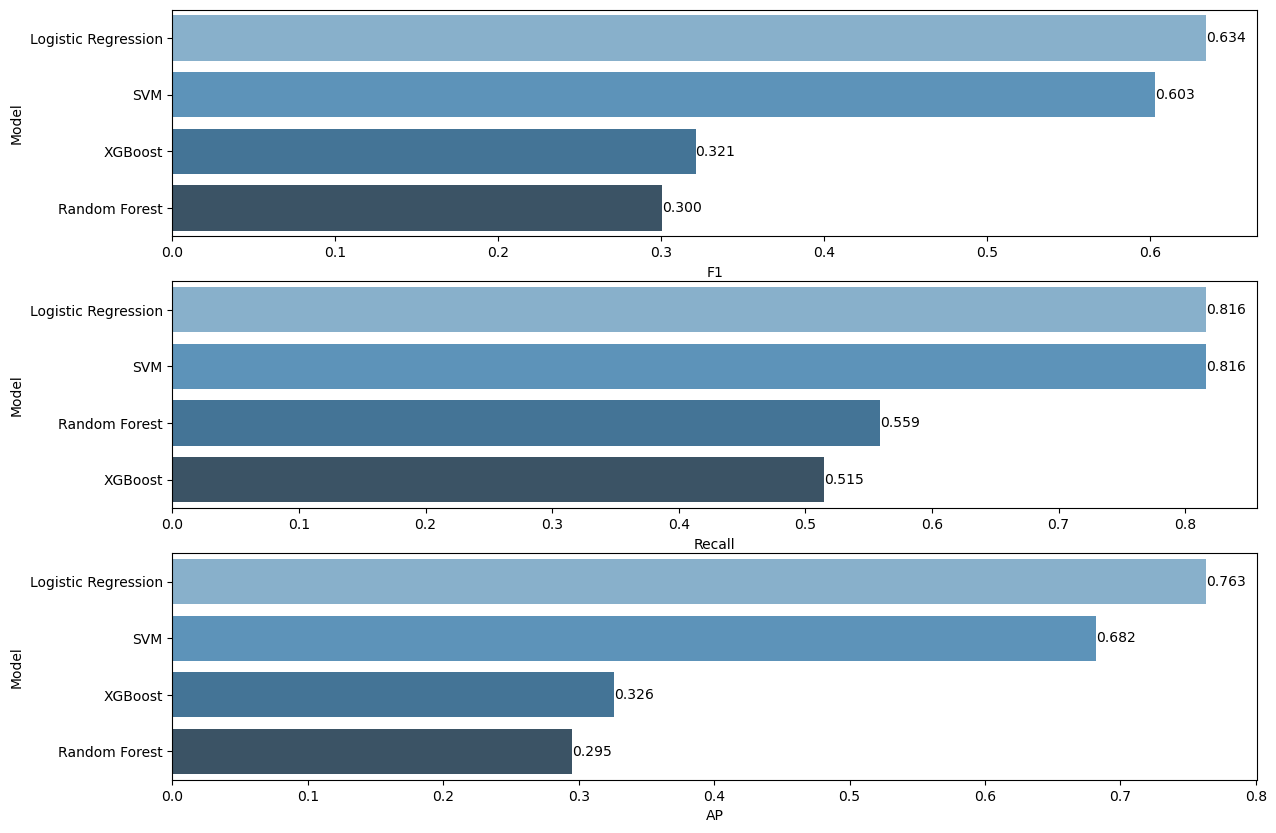

In [105]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

---
---

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [106]:
column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore", 
                                                            sparse=False), cat),
                                              remainder=MinMaxScaler())

operations_final = [("OneHotEncoder",column_trans_final),
                    ("log", LogisticRegression(class_weight='balanced',
                                               max_iter=10000,
                                               random_state=101))]

final_model = Pipeline(steps=operations_final)

In [107]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [108]:
X[X.Gender=="Male"].describe()


,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age
count,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.00000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000
mean,255.449090,1442.946397,335.819441,229.590921,1331.098487,252.16594,201.229546,416.004360,358.579636,275.632213,510.927674,74.844063,331.655809,315.718389,142.434983,1021.294178,246.362401,889.500385,619.217235,504.001026,392.426520,1519.422160,289.786868,1060.496794,254.390100,1293.040267,847.637599,623.143114,356.354706,36.095153,64.171070,23.109772,244.823544,804.885099,101.893819,271.573993,349.573480,310.528084,580.702231,480.928956,1132.125673,88.379841,212.571172,193.509361,154.183637,574.708130,199.760708,344.002052,72.564504,346.256732,379.948448,1063.412670,639.948705,431.393947,450.628623,489.366504,555.224929,492.625545,73.061554,409.670685,122.684534,398.192101,435.159528,1428.469351,116.610156,430.684791,268.313927,1179.902539,364.305976,149.832265,918.678636,897.179277,594.007951,1816.628879,1758.385483,1440.699667,1122.444473,626.335214,180.739420,813.085407,469.222878,131.116697,902.586817,1666.783278,478.017953,327.110798,943.043344,238.560400,388.017440,1058.239805,858.714286,176.168761,848.762247,30.172352
std,37.295117,62.356906,17.281413,14.579399,58.714251,12.89351,10.329358,19.074837,34.511924,17.512428,32.450260,4.097052,13.970798,16.640502,6.141613,76.330564,26.4

In [109]:
male_mean_human = X[X.Gender=="Male"].describe(include="all").loc["mean"]
male_mean_human


abdominalextensiondepthsitting      255.44909
acromialheight                    1442.946397
acromionradialelength              335.819441
anklecircumference                 229.590921
axillaheight                      1331.098487
balloffootcircumference             252.16594
balloffootlength                   201.229546
biacromialbreadth                   416.00436
bicepscircumferenceflexed          358.579636
bicristalbreadth                   275.632213
bideltoidbreadth                   510.927674
bimalleolarbreadth                  74.844063
bitragionchinarc                   331.655809
bitragionsubmandibulararc          315.718389
bizygomaticbreadth                 142.434983
buttockcircumference              1021.294178
buttockdepth                       246.362401
buttockheight                      889.500385
buttockkneelength                  619.217235
buttockpopliteallength             504.001026
calfcircumference                   392.42652
cervicaleheight                   

In [110]:
male_mean_human["Gender"] = "Male"
male_mean_human["SubjectsBirthLocation"] = "California"
male_mean_human["WritingPreference"] = "Right hand"


In [111]:
pd.DataFrame(male_mean_human).T

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
mean,255.44909,1442.946397,335.819441,229.590921,1331.098487,252.16594,201.229546,416.00436,358.579636,275.632213,510.927674,74.844063,331.655809,315.718389,142.434983,1021.294178,246.362401,889.500385,619.217235,504.001026,392.42652,1519.42216,289.786868,1060.496794,254.3901,1293.040267,847.637599,623.143114,356.354706,36.095153,64.17107,23.109772,244.823544,804.885099,101.893819,271.573993,349.57348,310.528084,580.702231,480.928956,1132.125673,88.379841,212.571172,193.509361,154.183637,574.70813,199.760708,344.002052,72.564504,346.256732,379.948448,1063.41267,639.948705,431.393947,450.628623,489.366504,555.224929,492.625545,73.061554,409.670685,122.684534,398.192101,435.159528,1428.469351,116.610156,430.684791,268.313927,1179.902539,364.305976,149.832265,918.678636,897.179277,594.007951,1816.628879,1758.385483,1440.699667,1122.444473,626.335214,180.73942,813.085407,469.222878,131.116697,902.586817,1666.783278,478.017953,327.110798,943.043344,238.5604,388.01744,1058.239805,858.714286,176.168761,848.762247,Male,California,30.172352,Right hand


In [112]:
final_model.predict(pd.DataFrame(male_mean_human).T)


array(['Hispanic'], dtype=object)

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [113]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)


0.7831660810065028

In [114]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7739520999384765